In [ ]:
%tensorflow_version 1.x

# Importing Libaries

In [ ]:

#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Dense, LSTM, Dropout
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
plt.style.use('fivethirtyeight')
import pywt


# Reading Dataset-1

In [ ]:
dataset_1 = pd.read_csv("/content/GS.csv")
df= dataset_1.copy()
df=df.dropna()
df=df[['Date','Close','Open','Low', 'High','Volume','Close_JPM','Close_MS']]
df['Date'] = pd.to_datetime(df['Date'])
df.index= df['Date']
df=df.drop(columns=['Date'])
df=df.head(2500)
df
#df=df.drop(columns=['Date','Prev Close','Last Price','Average Price'])
#df.rename(columns={0:"Low", 1:"High", 2:"Open", 3:"Close", 4:"Volume"}, inplace=True)

,Close,Open,Low,High,Volume,Close_JPM,Close_MS
Date,,,,,,,
2010-01-04,173.080002,170.050003,169.509995,174.250000,9135000,42.849998,30.910000
2010-01-05,176.139999,173.000000,172.570007,176.259995,11659400,43.680000,32.040001
2010-01-06,174.259995,175.380005,173.759995,175.380005,7381100,43.919998,32.450001
2010-01-07,177.669998,174.320007,173.949997,178.750000,8727400,44.790001,32.919998
2010-01-08,174.309998,176.330002,173.949997,177.429993,7268100,44.680000,32.250000
...,...,...,...,...,...,...,...
2019-12-02,217.639999,220.970001,217.080002,221.800003,2118500,131.470001,49.080002
2019-12-03,212.240005,215.429993,210.000000,215.429993,3207100,129.779999,48.110001
2019-12-04,215.940002,213.539993,212.380005,216.990005,1583600,132.339996,48.840000


# Reading Dataset-2

In [ ]:
dataset_1 = pd.read_csv("/content/APOLLOTYRE__EQ__NSE__NSE__MINUTE.csv")
dataset_1= dataset_1.drop(columns = ['open'])
dataset_1 = dataset_1.drop(columns = ['high'])
dataset_1 = dataset_1.drop(columns = ['low'])
dataset_1 = dataset_1.drop(columns = ['volume'])
df= dataset_1.copy()
df=df.dropna()
#df=df[['Date','Low Price', 'High Price','Open Price', 'Close Price', "No. of Trades"]]
#df['timestamp'] = pd.to_datetime(df['timestamp'])
df.index= df['timestamp']
df=df.drop(columns=['timestamp'])
df['Close']=df['close']
#df=df.tail(150000)
#df=df.head(12000)
df=df.tail(5000)
df=df.head(2000)
df

FileNotFoundError: ignored

# Reading Dataset-3

In [ ]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Show teh data
df

# Visualization of Dataset

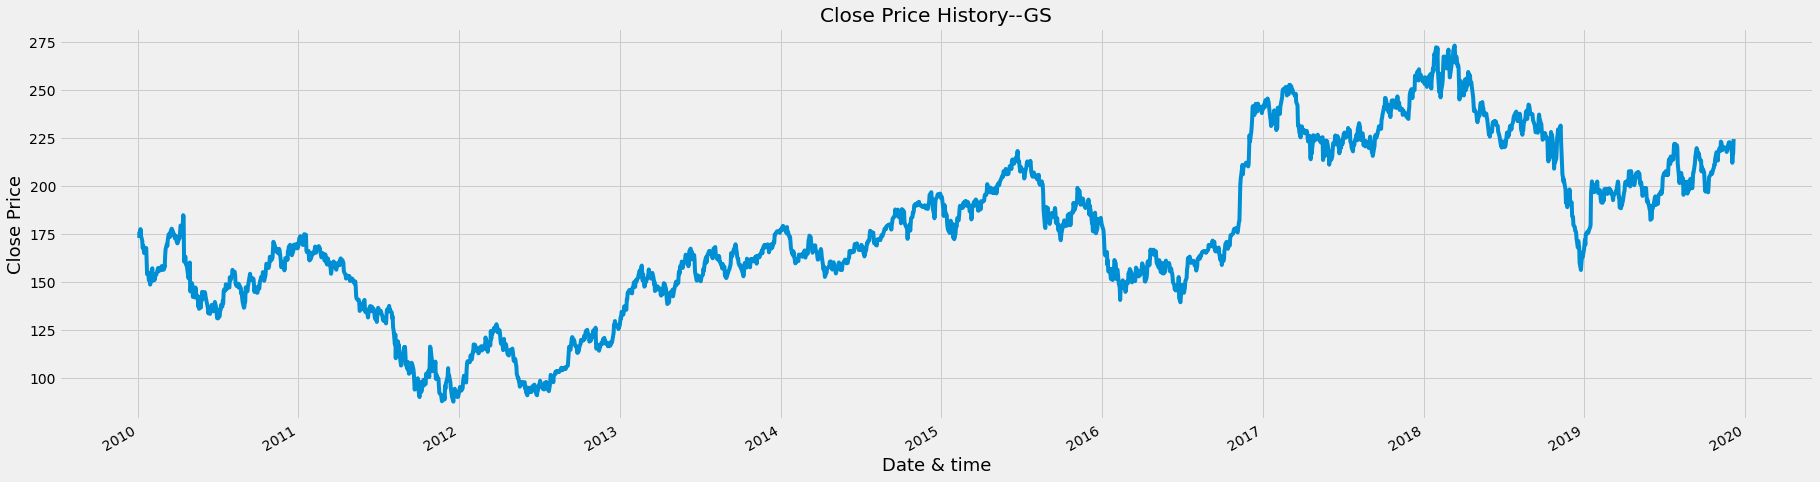

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(28,8))
plt.title('Close Price History')
df['Close'].plot()
#plt.plot(df['Close'])
plt.xlabel('Date & time', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close','Open','Low', 'High','Close_JPM','Close_MS'])
data

,Close,Open,Low,High,Close_JPM,Close_MS
Date,,,,,,
2010-01-04,173.080002,170.050003,169.509995,174.250000,42.849998,30.910000
2010-01-05,176.139999,173.000000,172.570007,176.259995,43.680000,32.040001
2010-01-06,174.259995,175.380005,173.759995,175.380005,43.919998,32.450001
2010-01-07,177.669998,174.320007,173.949997,178.750000,44.790001,32.919998
2010-01-08,174.309998,176.330002,173.949997,177.429993,44.680000,32.250000
...,...,...,...,...,...,...
2019-12-02,217.639999,220.970001,217.080002,221.800003,131.470001,49.080002
2019-12-03,212.240005,215.429993,210.000000,215.429993,129.779999,48.110001
2019-12-04,215.940002,213.539993,212.380005,216.990005,132.339996,48.840000


# Fourier Transform

In [ ]:
data_FT = data
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


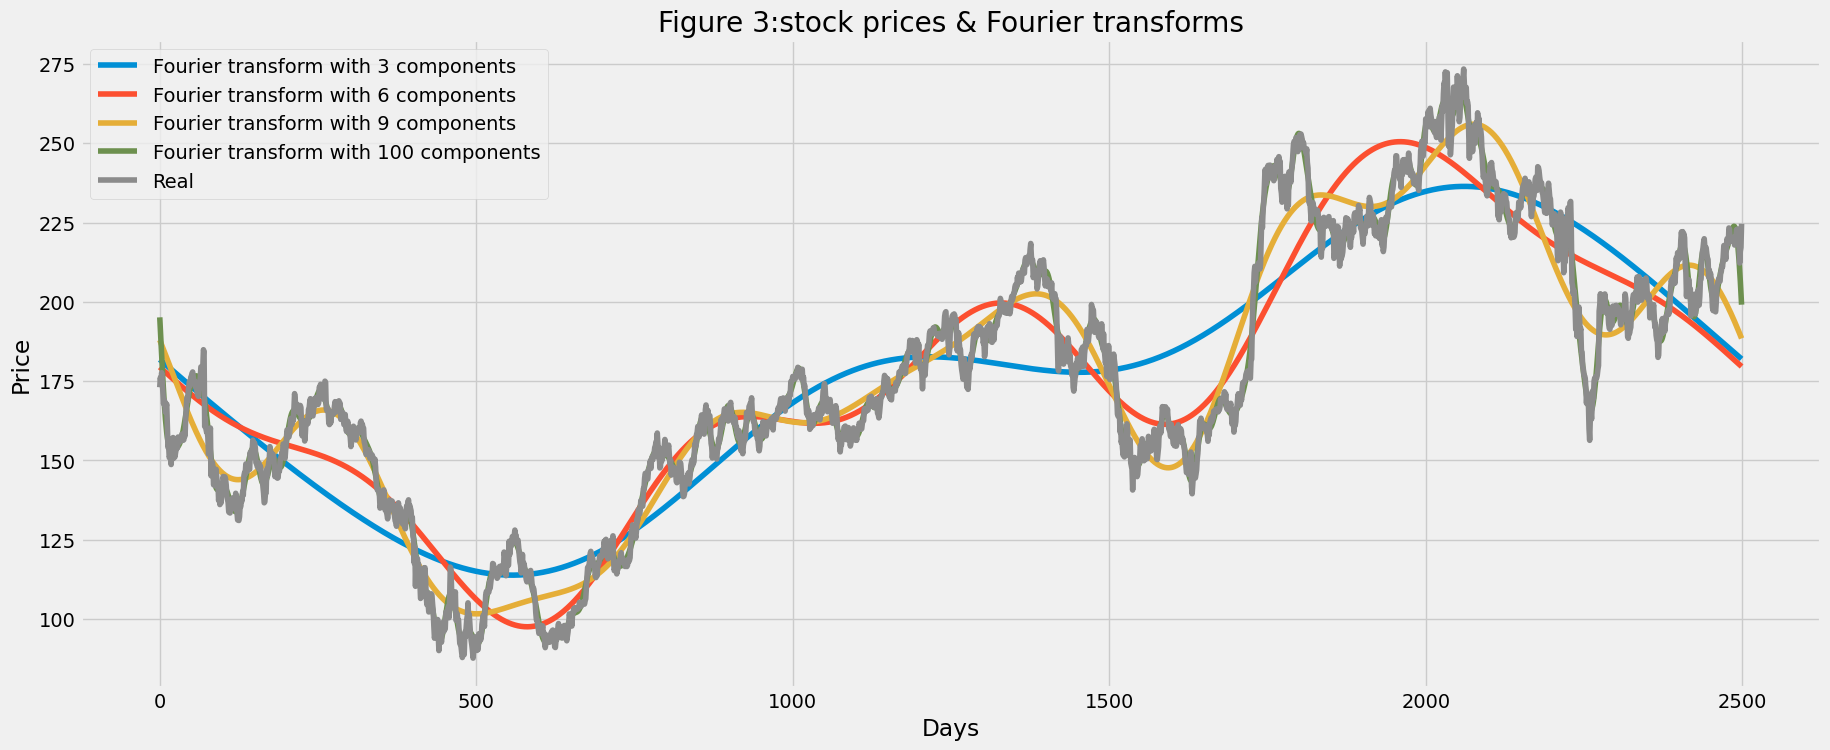

In [ ]:
plt.figure(figsize=(20, 8), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'].values,  label='Real')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Figure 3:stock prices & Fourier transforms')
plt.legend()
plt.show()


In [ ]:
num_=3
fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
temp=np.fft.ifft(fft_list_m10)
temp=np.real(temp)
data['fft']=temp
data.head()

,Close,Open,Low,High,Close_JPM,Close_MS,fft
Date,,,,,,,
2010-01-04,173.080002,170.050003,169.509995,174.250000,42.849998,30.910000,181.826300
2010-01-05,176.139999,173.000000,172.570007,176.259995,43.680000,32.040001,181.653792
2010-01-06,174.259995,175.380005,173.759995,175.380005,43.919998,32.450001,181.481332
2010-01-07,177.669998,174.320007,173.949997,178.750000,44.790001,32.919998,181.308919
2010-01-08,174.309998,176.330002,173.949997,177.429993,44.680000,32.250000,181.136555


In [ ]:
num_=6
fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
temp=np.fft.ifft(fft_list_m10)
temp=np.real(temp)
data['fft6']=temp
data.head()

,Close,Open,Low,High,Close_JPM,Close_MS,fft,fft6
Date,,,,,,,,
2010-01-04,173.080002,170.050003,169.509995,174.250000,42.849998,30.910000,181.826300,179.439092
2010-01-05,176.139999,173.000000,172.570007,176.259995,43.680000,32.040001,181.653792,179.258730
2010-01-06,174.259995,175.380005,173.759995,175.380005,43.919998,32.450001,181.481332,179.078464
2010-01-07,177.669998,174.320007,173.949997,178.750000,44.790001,32.919998,181.308919,178.898303
2010-01-08,174.309998,176.330002,173.949997,177.429993,44.680000,32.250000,181.136555,178.718260


In [ ]:
num_=9
fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
temp=np.fft.ifft(fft_list_m10)
temp=np.real(temp)
data['fft9']=temp
data.head()

,Close,Open,Low,High,Close_JPM,Close_MS,fft,fft6,fft9
Date,,,,,,,,,
2010-01-04,173.080002,170.050003,169.509995,174.250000,42.849998,30.910000,181.826300,179.439092,187.964476
2010-01-05,176.139999,173.000000,172.570007,176.259995,43.680000,32.040001,181.653792,179.258730,187.461431
2010-01-06,174.259995,175.380005,173.759995,175.380005,43.919998,32.450001,181.481332,179.078464,186.955929
2010-01-07,177.669998,174.320007,173.949997,178.750000,44.790001,32.919998,181.308919,178.898303,186.448096
2010-01-08,174.309998,176.330002,173.949997,177.429993,44.680000,32.250000,181.136555,178.718260,185.938063


In [ ]:
num_=15
fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
temp=np.fft.ifft(fft_list_m10)
temp=np.real(temp)
data['fft15']=temp
data.head()

,Close,Open,Low,High,Close_JPM,Close_MS,fft,fft6,fft9,ma7,ma21,fft15
Date,,,,,,,,,,,,
2010-01-04,173.080002,170.050003,169.509995,174.250000,42.849998,30.910000,181.826300,179.439092,191.421171,173.080002,173.080002,191.421171
2010-01-05,176.139999,173.000000,172.570007,176.259995,43.680000,32.040001,181.653792,179.258730,190.934640,176.139999,176.139999,190.934640
2010-01-06,174.259995,175.380005,173.759995,175.380005,43.919998,32.450001,181.481332,179.078464,190.443135,174.259995,174.259995,190.443135
2010-01-07,177.669998,174.320007,173.949997,178.750000,44.790001,32.919998,181.308919,178.898303,189.946755,177.669998,177.669998,189.946755
2010-01-08,174.309998,176.330002,173.949997,177.429993,44.680000,32.250000,181.136555,178.718260,189.445599,174.309998,174.309998,189.445599


# Technical Indicators

In [ ]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean().fillna(0)
    dataset['ma7'][0:7]=dataset['Close'][0:7]
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean().fillna(0)
    dataset['ma21'][0:21]=dataset['Close'][0:21]
    # Create MACD
#    dataset['26ema'] = pd.ewm(dataset['Close'], span=26)
#    dataset['12ema'] = pd.ewm(dataset['Close'], span=12)
#    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
#    dataset['20sd'] = pd.stats.moments.rolling_std(dataset['Close'],20)
#    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
#    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
#    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    # Create Momentum
#    dataset['momentum'] = dataset['Close']-1
    
    return dataset

In [ ]:
data = get_technical_indicators(data)
data.head(8)

,Close,Open,Low,High,Close_JPM,Close_MS,fft,fft6,fft9,ma7,ma21,fft15
Date,,,,,,,,,,,,
2010-01-04,173.080002,170.050003,169.509995,174.250000,42.849998,30.910000,181.826300,179.439092,191.421171,173.080002,173.080002,191.421171
2010-01-05,176.139999,173.000000,172.570007,176.259995,43.680000,32.040001,181.653792,179.258730,190.934640,176.139999,176.139999,190.934640
2010-01-06,174.259995,175.380005,173.759995,175.380005,43.919998,32.450001,181.481332,179.078464,190.443135,174.259995,174.259995,190.443135
2010-01-07,177.669998,174.320007,173.949997,178.750000,44.790001,32.919998,181.308919,178.898303,189.946755,177.669998,177.669998,189.946755
2010-01-08,174.309998,176.330002,173.949997,177.429993,44.680000,32.250000,181.136555,178.718260,189.445599,174.309998,174.309998,189.445599
2010-01-11,171.559998,175.059998,170.520004,175.059998,44.529999,32.040001,180.964240,178.538345,188.939770,171.559998,171.559998,188.939770
2010-01-12,167.820007,170.009995,167.029999,170.479996,43.490002,31.129999,180.791974,178.358570,188.429376,167.820007,167.820007,188.429376
2010-01-13,169.070007,168.009995,166.119995,169.669998,44.250000,31.260000,180.619760,178.178945,187.914527,172.975715,169.070007,187.914527


In [ ]:
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)

training_data_len
print(dataset.shape)

(2500, 12)


# MinMax Scaling

In [ ]:
#Scale the data
scaler1 = MinMaxScaler(feature_range=(0,1))
d1=dataset[:,0].reshape(-1,1)
scaled_data_1 = scaler1.fit_transform(d1)
scaler2 = MinMaxScaler(feature_range=(0,1))
d2=dataset[:,1:]
scaled_data_2 = scaler2.fit_transform(d2)
scaled_data=np.column_stack((scaled_data_1,scaled_data_2))

# Visualization of all features used for training

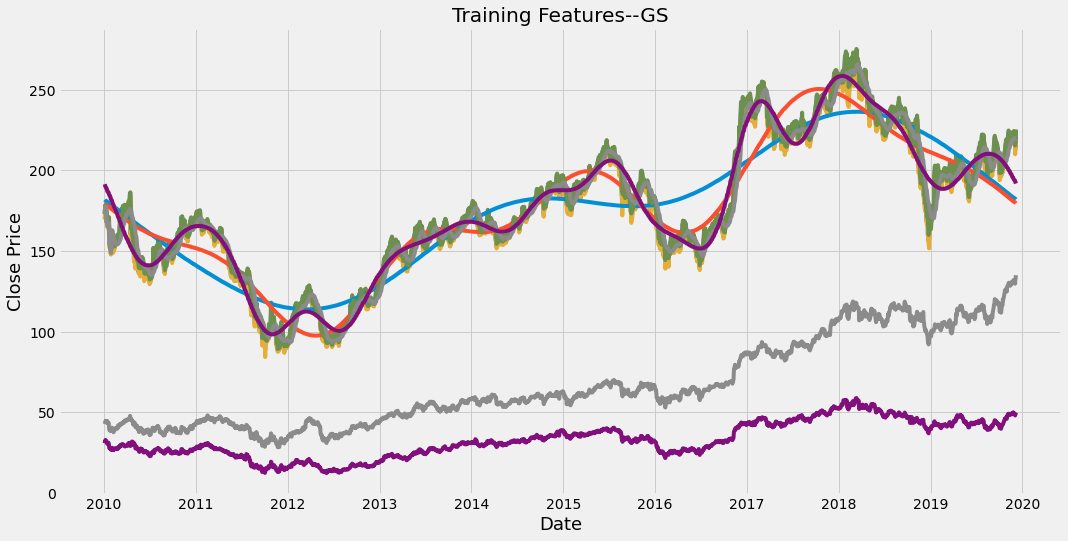

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Training Features--GS')
plt.plot(data)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()


In [ ]:
print (data)

                 Close        Open  ...        ma21       fft15
Date                                ...                        
2010-01-04  173.080002  170.050003  ...  173.080002  191.421171
2010-01-05  176.139999  173.000000  ...  176.139999  190.934640
2010-01-06  174.259995  175.380005  ...  174.259995  190.443135
2010-01-07  177.669998  174.320007  ...  177.669998  189.946755
2010-01-08  174.309998  176.330002  ...  174.309998  189.445599
...                ...         ...  ...         ...         ...
2019-12-02  217.639999  220.970001  ...  220.109047  193.776056
2019-12-03  212.240005  215.429993  ...  219.863809  193.315736
2019-12-04  215.940002  213.539993  ...  219.676666  192.850004
2019-12-05  217.139999  217.149994  ...  219.605238  192.378943
2019-12-06  224.610001  219.949997  ...  219.900000  191.902636

[2500 rows x 12 columns]


# Making dataset suitable for LSTM

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([[0.45982336, 0.4401439 , 0.45705095, 0.45675429, 0.13566473,
        0.39849624, 0.55470835, 0.53534302, 0.58055774, 0.46411532,
        0.46214977, 0.58055774],
       [0.47630331, 0.45598026, 0.47345852, 0.46755898, 0.14344648,
        0.42277124, 0.55330053, 0.53416343, 0.57752109, 0.48117556,
        0.47989957, 0.57752109],
       [0.46617834, 0.46875675, 0.47983915, 0.46282861, 0.1456966 ,
        0.43157897, 0.55189309, 0.53298446, 0.5744534 , 0.47069407,
        0.46899443, 0.5744534 ],
       [0.48454328, 0.46306641, 0.48085793, 0.48094394, 0.15385339,
        0.44167557, 0.55048603, 0.53180619, 0.57135528, 0.48970568,
        0.48877447, 0.57135528],
       [0.46644764, 0.47385659, 0.48085793, 0.47384827, 0.15282207,
        0.42728249, 0.54907937, 0.53062868, 0.56822735, 0.47097285,
        0.46928448, 0.56822735],
       [0.45163721, 0.46703887, 0.46246655, 0.46110842, 0.15141572,
        0.42277124, 0.54767312, 0.52945201, 0.56507025, 0.45564092,
        0.45333285

# 

In [ ]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
x_train.shape

(1940, 60, 12)

In [ ]:
#Create the testing data set 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,0]
y_test_scaled=scaled_data[training_data_len:,0]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i])
 # y_test_scaled.append(train_data[i, 0])
#Convert the data to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2] ))

# LSTM Model

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape= (x_train.shape[1], x_train.shape[2])))
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(LSTM(60, return_sequences= True))
model.add(Dropout(0.5))
model.add(LSTM(30, return_sequences= True))
model.add(Dropout(0.5))
model.add(LSTM(30, return_sequences= False))
model.add(Dropout(0.5))
model.add(Dense(25))
model.add(Dense(1))
#Compile the model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsprop=optimizers.RMSprop(lr=0.01, rho=0.9)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
#Train the mode
hist=model.fit(x_train, y_train, batch_size=194, epochs=180,validation_data=(x_test,y_test_scaled),shuffle=False)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 60, 200)           170400    
_________________________________________________________________
dense_18 (Dense)             (None, 60, 50)            10050     
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_27 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 60, 30)            10920     
_________________________________________________________________
dropout_28 (Dropout)         (None, 60, 30)           

Text(0, 0.5, 'loss')

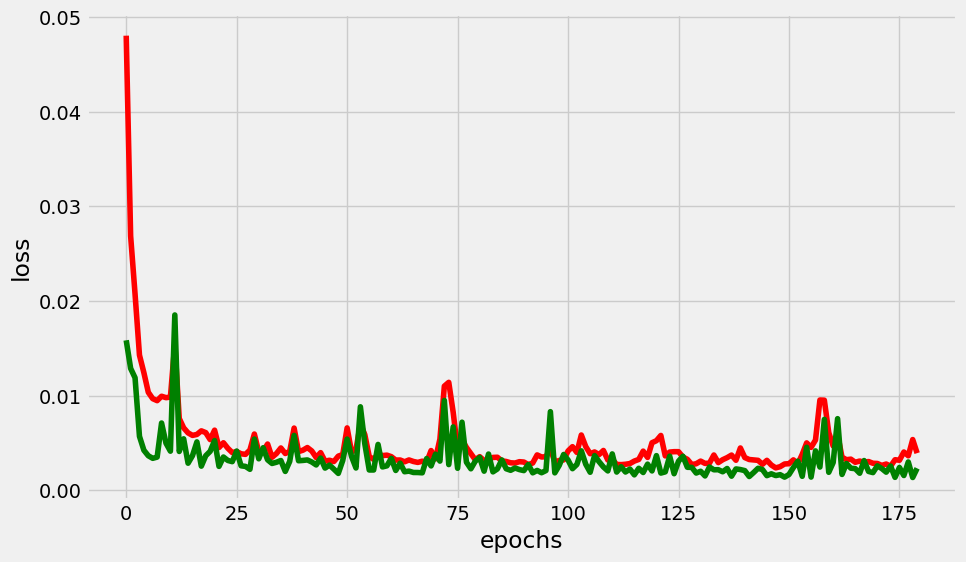

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
plt.plot(hist.history['loss'],label='lstm_train',color='red')
plt.plot(hist.history['val_loss'],label='lstm_test',color='green')
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
#Get the models predicted price values 
predictions = model.predict(x_test)

# Error Calculation

In [ ]:
rmse=np.sqrt(np.mean(((predictions- scaled_data[training_data_len:,0 ])**2)))
print(rmse)
predictions = scaler1.inverse_transform(predictions)
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

0.17279637447750754
32.08483166484021


# Visualization of Predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


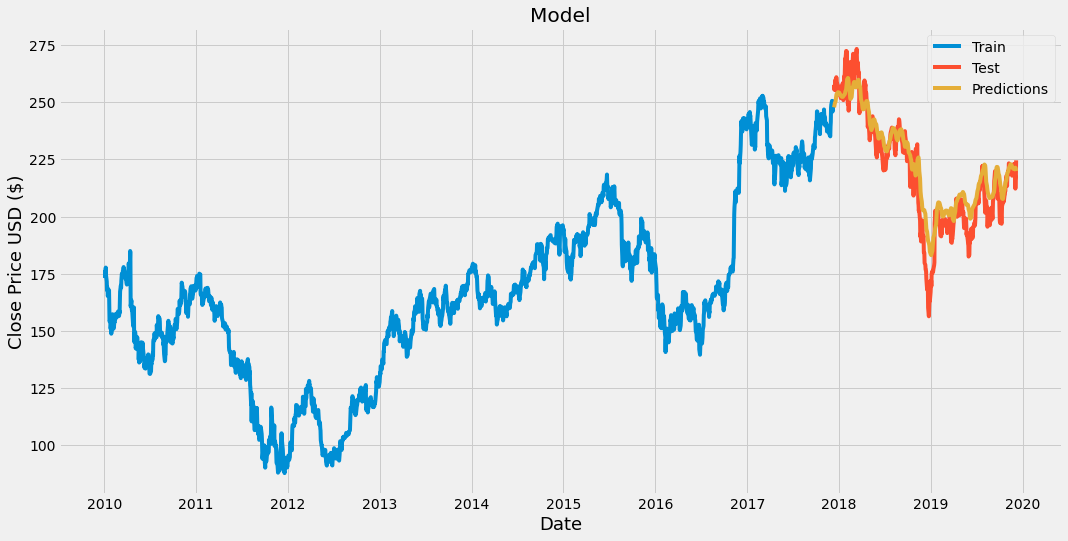

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
#train['Close'].plot()
#valid[['Close', 'Predictions']].plot()
plt.legend(['Train', 'Test', 'Predictions'], loc='upper right')
plt.show()

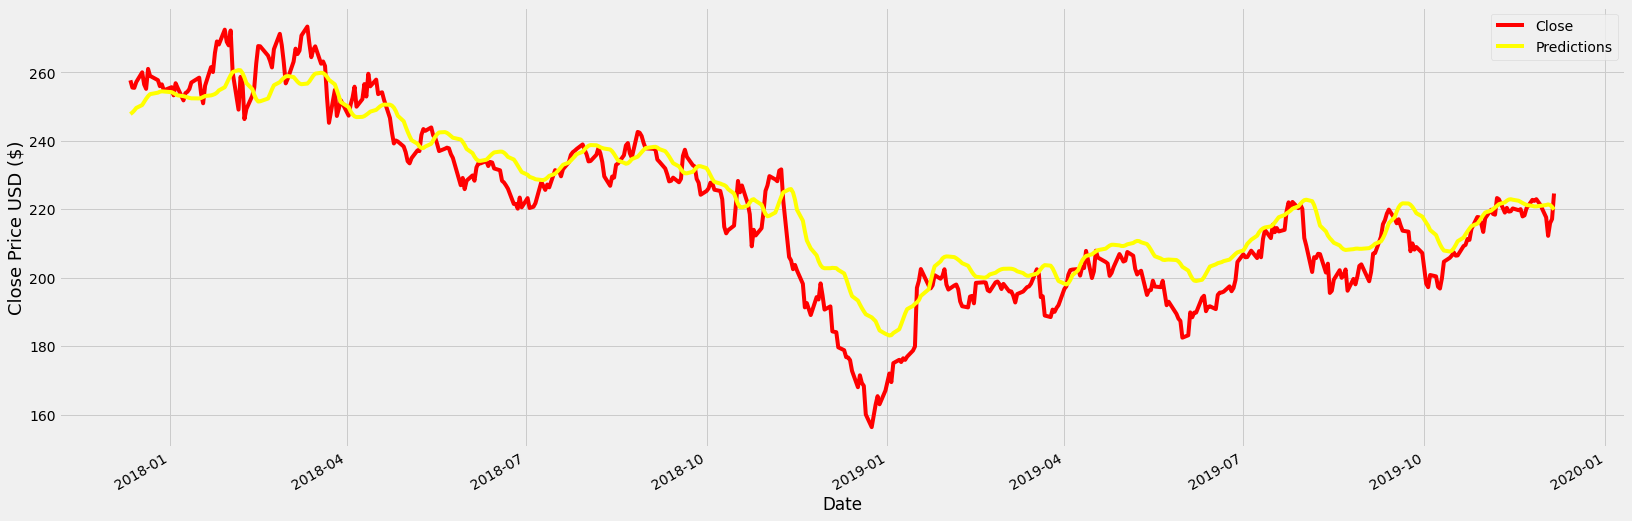

In [ ]:
plt.figure()
plt.ylabel('Close Price USD ($)', fontsize=18)
valid['Close'].plot(legend=True, color='red')
valid['Predictions'].plot(legend=True, color='yellow', figsize=(25,9))
#plt.plot(valid[['Close', 'Predictions']],figsize=(20,8))

# Correlation Coefficient Calculation

In [ ]:
#Show the valid and predicted prices
valid
k1=np.corrcoef(valid['Close'],valid['Predictions'])
print (k1[0][1])

0.964596890876129
